Fuente: 
- https://www.kaggle.com/scratchpad/notebook4031fa4176/edit
- https://www.kaggle.com/srikarkashyap/analyzing-healthcare-data-tutorial

# Analizando datos de programas de salud (EDA)

## Introducción

NTR Vaidya Seva (o Arogya Seva) es el programa de salud insignia del gobierno de Anhra Pradesh (India), con el cual las personas de bajos ingresos de ese estado pueden obtener salud pública de forma gratuita para muchas enfermedades y dolencias importantes

## A meter código!

Comenzamos importando las librerias necesarias:
* *Pandas* para cargar datos y explorar los datos
* *Matplotlib, Seaborn* para su visualización.

In [1]:
# Importamos las librerias 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Vamos a leer el archivo de datos usando la función *read_csv* de Pandas. *read_csv* puede leer de manera sencilla archivos de valores separados por comas (csv).

No existen restricciones para nombrar las variables. *df*, *data* son los términos genéricos más comunes. Arrancamos con *data*.

In [2]:
# Leemos el dataframe
data = pd.read_csv('https://github.com/matog/iSalud-IntroCienciaDeDatos/raw/main/ntrarogyaseva.zip')
# data = pd.read_csv('data/ntrarogyaseva.csv')

Explotamos los datos con la función *head()* que por defecto, muestra los primeros 5 datos.

In [3]:
data.sample(10)

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
466885,466886,77,Female,BC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Jaladanki,Jaladanki,...,15000,Kandukuri Hospital,C,NELLORE,Nellore,15/10/2017 00:00:00,16/10/2017 00:00:00,NO,NaN,P
43841,43842,36,Male,SC,S5,ORTHOPEDIC SURGERY AND PROCEDURES,S5.1.1,Bone Grafting As Exclusive Procedure,Phirangipuram,Phirangipuram,...,10000,District Hospital - Tenali,G,Guntur,Guntur,07/09/2016 00:00:00,17/09/2016 00:00:00,NO,NaN,CMO
157708,157709,32,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Bandi Atmakur,Bandi Atmakur,...,12750,Prime Hospitals,C,HYDERABAD,Hyderabad,06/01/2017 00:00:00,03/02/2017 00:00:00,NO,NaN,D
93415,93416,0,Male(Child),BC,M4,PEDIATRICS,M4.1.13,Medical Management of Term Baby With Severe Pe...,24th Ward,Srikakulam Muncipality,...,20000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,07/11/2016 00:00:00,11/11/2016 00:00:00,NO,NaN,D
134503,134504,61,Female,BC,S1,GENERAL SURGERY,S1.3.2.2,Surgical treatment for Appendicular Perforation,Bodevandlapalle,Yerravaripalem,...,25870,S.V.R.R.Hospital,G,TIRUPATHI,Chittoor,14/12/2016 00:00:00,26/12/2016 00:00:00,NO,NaN,D
67296,67297,53,Male,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Vedayapalem,Nellore,...,12500,Government General Hospital - Nellore,G,NELLORE,Nellore,09/10/2016 00:00:00,05/11/2016 00:00:00,NO,NaN,CMO
387443,387444,71,Male,SC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-3,Gudur,...,30000,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,20/07/2017 00:00:00,24/07/2017 00:00:00,NO,NaN,D
50701,50702,0,Male(Child),SC,M4,PEDIATRICS,M4.1.15,Medical Management of Term Baby Severe Hyperbi...,Padikondalapalem,Pamidimukkala,...,25000,District Hospital - Machilipatnam,G,MACHILIPATNAM,Krishna,16/09/2016 00:00:00,23/09/2016 00:00:00,NO,NaN,D
262915,262916,31,Female,BC,S13,RADIATION ONCOLOGY,S13.2.2,Palliative Treatment With Photons External Bea...,Ulchala,Kurnool,...,26000,OMEGA HOSPITALS A UNIT OF KURNOOL INSTITUTE OF...,C,KURNOOL,Kurnool,07/04/2017 00:00:00,20/04/2017 00:00:00,NO,NaN,D
63138,63139,60,Female,BC,S12,MEDICAL ONCOLOGY,S12.31.1,Chemotherapy for Multiple myeloma with Zoledro...,Venkatapuram,Dhone,...,21966,Nims Hospitals,G,HYDERABAD,Hyderabad,04/10/2016 00:00:00,15/10/2016 00:00:00,NO,NaN,D


In [4]:
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

Ahora vamos a mostrar algunas estadisticas simples de las columnas numéricas del dataset. Utilizamos la función *describe* de los datos para obtenerlas..

In [5]:
# Estadísticas descriptivas
# data.describe(include='all') # Incluye todas las variables
data.describe()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.000000,479688.000000,479688.000000,479688.000000
mean,239844.500000,44.912264,30428.941698,27652.205861
std,138474.142301,18.961084,27441.592281,25951.706037
min,1.000000,0.000000,5.000000,2.000000
25%,119922.750000,34.000000,12500.000000,12500.000000
50%,239844.500000,47.000000,25000.000000,23200.000000
75%,359766.250000,59.000000,35000.000000,30600.000000
max,479688.000000,107.000000,520000.000000,520000.000000


Ahora analizamos los nombres de las columnas

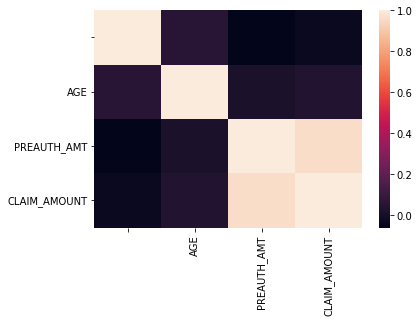

In [6]:
# Matriz de correlación. Texto y grafica. Descomentar la que se quiera ejecutar, y comentar la restante.
# data.corr()
sns.heatmap(data.corr());

In [7]:
# Muestra los nombres de las columnas en el dataset _data_
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0                     479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

### Tamaño del dataframe

In [9]:
data[['HOSP_DISTRICT']].value_counts()

HOSP_DISTRICT 
Guntur            60988
Vishakhapatnam    59334
East Godavari     58065
Chittoor          49172
Krishna           45174
Nellore           42405
Kurnool           33024
Hyderabad         27915
West Godavari     23769
Anantapur         18444
Prakasam          16756
Srikakulam        16137
Vizianagaram      13563
YSR Kadapa        13329
Ranga Reddy        1244
Khammam             346
Karimnagar           11
Mahabubnagar          6
Nizamabad             3
Warangal              3
dtype: int64

In [10]:
data.shape

(479688, 24)

### Creación de variables
Es muy útil trabajar con las variables existentes para generar nueva información.

In [11]:
data['CATEGORY'] = data['CATEGORY_CODE'] + ' - ' + data['CATEGORY_NAME']
data[['CATEGORY_CODE', 'CATEGORY_NAME']].sample(10)

,CATEGORY_CODE,CATEGORY_NAME
88416,M6,NEPHROLOGY
42690,M6,NEPHROLOGY
415764,M6,NEPHROLOGY
425097,S4,GYNAECOLOGY AND OBSTETRICS SURGERY
239375,S5,ORTHOPEDIC SURGERY AND PROCEDURES
101843,S12,MEDICAL ONCOLOGY
328741,S12,MEDICAL ONCOLOGY
172646,M6,NEPHROLOGY
3122,M12,GASTROENTEROLOGY
443325,S9,GENITO URINARY SURGERIES


In [12]:
data['DIFF'] = data['CLAIM_AMOUNT'] - data['PREAUTH_AMT']

In [13]:
data[['CLAIM_AMOUNT','PREAUTH_AMT', 'DIFF']]

,CLAIM_AMOUNT,PREAUTH_AMT,DIFF
0,11000,12500,-1500
1,11000,12500,-1500
2,11500,12500,-1000
3,11000,12500,-1500
4,11000,12500,-1500
...,...,...,...
479683,24910,24910,0
479684,45910,45910,0
479685,30000,30000,0
479686,23020,23020,0


In [14]:
# Eliminamos las variables recién creadas
# data.drop(['DIFF', 'CATEGORY_NAME'], axis = 1, inplace = True)

In [15]:
data.head(2)

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CATEGORY,DIFF
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D,M6 - NEPHROLOGY,-1500
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D,M6 - NEPHROLOGY,-1500


### Corrección de formatos 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0                     479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

Las columnas PREAUTH_DATE, CLAIM_DATE, SURGERY_DATE, DISCHARGE_DATE y MORTALITY_DATE son cargadas como si fueran del tipo Object, cuando en realidad deberían ser levantadas como fechas

In [17]:
from datetime import datetime

In [18]:
# Convertimos el campo DISCHARGE_DATE a fecha. Tira un error
data['DISCHARGE_DATE'] = pd.to_datetime(data['DISCHARGE_DATE'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 116-04-30 00:00:00

In [19]:
# Buscamos el error:
# Alternativa I:
data.loc[data['DISCHARGE_DATE'].str.contains('116', na=False)]

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CATEGORY,DIFF
1767,1768,44,Male,ST,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ratnapuram,Chintur,...,G,KHAMMAM,Khammam,27/01/2016 00:00:00,30/04/0116 00:00:00,YES,30/04/2016 00:00:00,D,M6 - NEPHROLOGY,0
2856,2857,44,Male,ST,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kusumanapalli,Bhadrachalam,...,G,KHAMMAM,Khammam,02/03/2016 00:00:00,30/04/0116 00:00:00,YES,30/04/2016 00:00:00,D,M6 - NEPHROLOGY,0


In [20]:
# Buscamos el error:
# Alternativa II
data.loc[data['DISCHARGE_DATE']=='30/04/0116 00:00:00']

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CATEGORY,DIFF
1767,1768,44,Male,ST,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ratnapuram,Chintur,...,G,KHAMMAM,Khammam,27/01/2016 00:00:00,30/04/0116 00:00:00,YES,30/04/2016 00:00:00,D,M6 - NEPHROLOGY,0
2856,2857,44,Male,ST,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kusumanapalli,Bhadrachalam,...,G,KHAMMAM,Khammam,02/03/2016 00:00:00,30/04/0116 00:00:00,YES,30/04/2016 00:00:00,D,M6 - NEPHROLOGY,0


In [21]:
# Reemplazamos los datos erroneos:
# Alternativa I
mappings = {'30/04/0116 00:00:00':'30/04/2016 00:00:00'}

In [22]:
data['DISCHARGE_DATE'] = data['DISCHARGE_DATE'].replace(mappings)

In [23]:
# Alternativa II
data.loc[data['AGE']=='30/04/0116 00:00:00', 'DISCHARGE_DATE'] = '30/04/2016 00:00:00'

In [24]:
# Convertimos el campo DISCHARGE_DATE a fecha nuevamente
data['DISCHARGE_DATE'] = pd.to_datetime(data['DISCHARGE_DATE'])

In [25]:
data['PREAUTH_DATE'] = pd.to_datetime(data['PREAUTH_DATE'])

In [26]:
data['CLAIM_DATE'] = pd.to_datetime(data['CLAIM_DATE'])

In [27]:
data['MORTALITY_DATE'] = pd.to_datetime(data['MORTALITY_DATE'])

In [28]:
data['SURGERY_DATE'] = pd.to_datetime(data['SURGERY_DATE'])

In [29]:
# Borramos la columna que tiene el índice del CSV 
data = data.drop('   ', axis = 1)

In [30]:
# data.to_csv('data/ntrarogyaseva_fixed.csv', index = False)

### NAN Values 

In [31]:
data.isnull().sum()
# data['DISCHARGE_DATE'].isnull().sum()

AGE                      0
SEX                      0
CASTE_NAME               0
CATEGORY_CODE            0
CATEGORY_NAME            0
SURGERY_CODE             0
SURGERY                  0
VILLAGE                  0
MANDAL_NAME              0
DISTRICT_NAME            0
PREAUTH_DATE             0
PREAUTH_AMT              0
CLAIM_DATE               0
CLAIM_AMOUNT             0
HOSP_NAME                0
HOSP_TYPE                0
HOSP_LOCATION            0
HOSP_DISTRICT            0
SURGERY_DATE             0
DISCHARGE_DATE        4560
Mortality Y / N          0
MORTALITY_DATE      469566
SRC_REGISTRATION         0
CATEGORY                 0
DIFF                     0
dtype: int64

In [32]:
# DISCHARGE_DATE tiene NAs porque pueden referirse a los pacientes que siguen internados o no tienen el alta
data.loc[data['DISCHARGE_DATE'].isna()]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CATEGORY,DIFF
7,73,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Bhoghapuram,Bhoghapuram,Vizianagaram,...,C,Visakhapatnam,Vishakhapatnam,2014-05-05,NaT,YES,2014-05-23,D,M6 - NEPHROLOGY,-7500
10,52,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Rajam,Butchayyapeta,Vishakhapatnam,...,C,Visakhapatnam,Vishakhapatnam,2014-06-27,NaT,YES,2014-07-16,P,M6 - NEPHROLOGY,-6250
86,40,Male,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dakamarri,Bheemunipatnam,Vishakhapatnam,...,C,Visakhapatnam,Vishakhapatnam,2015-02-23,NaT,YES,2015-10-03,D,M6 - NEPHROLOGY,-6250
97,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,Krishna,...,C,VIJAYAWADA,Krishna,2015-08-04,NaT,YES,2015-03-05,P,M6 - NEPHROLOGY,-2500
122,58,Female,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Mudunuruu,Vuyyuru,Krishna,...,C,VIJAYAWADA,Krishna,2015-06-15,NaT,YES,2015-08-23,D,M6 - NEPHROLOGY,-1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479300,69,Male,OC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Badvel (P) (U),Badvel,YSR Kadapa,...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D,M6 - NEPHROLOGY,-9252
479305,60,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Garividi (Urban),Garividi,Vizianagaram,...,C,VIZIANAGARAM,Vizianagaram,2017-12-11,NaT,YES,2017-11-26,D,M6 - NEPHROLOGY,-5140
479372,67,Female,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ambapuram,Nellore,Nellore,...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D,M5 - CARDIOLOGY,-20000
479403,0,Male(Child),Minorities,M4,PEDIATRICS,M4.1.14,Medical Management of Term Baby With Severe Pe...,Guntur (U),Guntur,Guntur,...,C,NARSARAOPET,Guntur,2017-11-11,NaT,YES,2017-11-17,D,M4 - PEDIATRICS,-10000


In [33]:
# Podemos chequear si hay pacientes con DISCHARGE_DATE NA y que hallan fallecido
data.loc[(data['Mortality Y / N']=='YES') & (data['DISCHARGE_DATE'].isna())]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CATEGORY,DIFF
7,73,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Bhoghapuram,Bhoghapuram,Vizianagaram,...,C,Visakhapatnam,Vishakhapatnam,2014-05-05,NaT,YES,2014-05-23,D,M6 - NEPHROLOGY,-7500
10,52,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Rajam,Butchayyapeta,Vishakhapatnam,...,C,Visakhapatnam,Vishakhapatnam,2014-06-27,NaT,YES,2014-07-16,P,M6 - NEPHROLOGY,-6250
86,40,Male,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dakamarri,Bheemunipatnam,Vishakhapatnam,...,C,Visakhapatnam,Vishakhapatnam,2015-02-23,NaT,YES,2015-10-03,D,M6 - NEPHROLOGY,-6250
97,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,Krishna,...,C,VIJAYAWADA,Krishna,2015-08-04,NaT,YES,2015-03-05,P,M6 - NEPHROLOGY,-2500
122,58,Female,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Mudunuruu,Vuyyuru,Krishna,...,C,VIJAYAWADA,Krishna,2015-06-15,NaT,YES,2015-08-23,D,M6 - NEPHROLOGY,-1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479300,69,Male,OC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Badvel (P) (U),Badvel,YSR Kadapa,...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D,M6 - NEPHROLOGY,-9252
479305,60,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Garividi (Urban),Garividi,Vizianagaram,...,C,VIZIANAGARAM,Vizianagaram,2017-12-11,NaT,YES,2017-11-26,D,M6 - NEPHROLOGY,-5140
479372,67,Female,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ambapuram,Nellore,Nellore,...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D,M5 - CARDIOLOGY,-20000
479403,0,Male(Child),Minorities,M4,PEDIATRICS,M4.1.14,Medical Management of Term Baby With Severe Pe...,Guntur (U),Guntur,Guntur,...,C,NARSARAOPET,Guntur,2017-11-11,NaT,YES,2017-11-17,D,M4 - PEDIATRICS,-10000


In [34]:
# Los MORTALITY_DATE en blanco, es porque no falleció o por error en la base
data.loc[(data['Mortality Y / N']=='NO') & (data['MORTALITY_DATE'].isna())]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CATEGORY,DIFF
0,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,...,G,SRIKAKULAM,Srikakulam,2013-06-08,2013-07-09,NO,NaT,D,M6 - NEPHROLOGY,-1500
1,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,...,G,SRIKAKULAM,Srikakulam,2013-08-08,2013-09-09,NO,NaT,D,M6 - NEPHROLOGY,-1500
2,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,...,G,SRIKAKULAM,Srikakulam,2013-08-15,2013-10-18,NO,NaT,D,M6 - NEPHROLOGY,-1000
3,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,...,G,SRIKAKULAM,Srikakulam,2013-08-24,2013-09-27,NO,NaT,D,M6 - NEPHROLOGY,-1500
4,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,...,G,SRIKAKULAM,Srikakulam,2013-08-31,2013-02-10,NO,NaT,D,M6 - NEPHROLOGY,-1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479683,22,Female,BC,S4,GYNAECOLOGY AND OBSTETRICS SURGERY,S4.2.2,Laparoscopic Cystectomy,Kalayakagollu,Butchireddipalem,Nellore,...,C,NELLORE,Nellore,2017-11-15,2017-11-19,NO,NaT,D,S4 - GYNAECOLOGY AND OBSTETRICS SURGERY,0
479684,60,Male,BC,S12,MEDICAL ONCOLOGY,S12.16.2.2,Chemotherapy for Non Hodgkin Lymphoma with R ...,Rajupalem,Kothapatnam,Prakasam,...,C,GUNTUR,Guntur,2017-11-17,2017-11-18,NO,NaT,D,S12 - MEDICAL ONCOLOGY,0
479685,38,Male,OC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Yeturu,Chejerla,Nellore,...,C,NELLORE,Nellore,2017-11-16,2017-11-18,NO,NaT,D,S15 - POLY TRAUMA,0
479686,59,Male,OC,S3,OPHTHALMOLOGY SURGERY,S3.3.1,Vitrectomy,Ganapavaram,Ganapavaram,West Godavari,...,C,GUNTUR,Guntur,2017-11-16,2017-11-18,NO,NaT,D,S3 - OPHTHALMOLOGY SURGERY,0


### map, apply, mapapply 

In [35]:
# data = pd.read_csv('data/ntrarogyaseva_fixed.csv')

In [36]:
data['CASTE_NAME'].value_counts()

BC            246164
OC            114123
SC             76742
Minorities     29150
ST             13138
Others           371
Name: CASTE_NAME, dtype: int64

| Sigla       | Definición|
|-----------|---------------------|
| OC:       | other category |
| BC:       | backward class    |
| SC:       | scheduded caste    |
| ST:       | scheduled tribes   |
| obc       |other backward class    |

In [37]:
# map: mapea valores de una serie
caste_mapper = { 'OC':'other category',
                 'BC':'backward class',
                 'SC':'scheduled caste',
                 'ST':'scheduled tribes',
                 'Minorities':'Minorities',
                 'Others':'Others'
}

data['CASTE_NAME'] = data['CASTE_NAME'].map(caste_mapper)

In [38]:
# Apply
# 'Aplica' una función a un eje del DataFrame
#     axis=0: Aplica la función a cada fila
#     axis=1: Aplica la función a cada columna


# Supongamos que el programa aplica una serie de descuentos sobre los costos de la operación según la edad
def calculate_total_cost(row):
    total_cost = 0
    if (row['AGE']<80) & (row['AGE']>69):
        total_cost = row['PREAUTH_AMT'] - row['PREAUTH_AMT']*0.20
    if (row['AGE']<70) & (row['AGE']>59):
        total_cost = row['PREAUTH_AMT'] - row['PREAUTH_AMT']*0.15
    if (row['AGE']<60) & (row['AGE']>49):
        total_cost = row['PREAUTH_AMT'] - row['PREAUTH_AMT']*0.10
    return total_cost


def calculate_group_age(row):
    AGE_CAT = ''
    if (row['AGE']<10) :
        AGE_CAT = 'Child'
    if (row['AGE']<18) & (row['AGE']>9):
        AGE_CAT = 'Young'
    return AGE_CAT

In [39]:
# data.apply(calculate_total_cost, axis=1)
data['DISCOUNT_COST'] = data.apply(calculate_total_cost, axis=1)

# data['GROUP_AGE'] = data.apply(calculate_group_age, axis=1)


In [40]:
data[['AGE', 'PREAUTH_AMT', 'DISCOUNT_COST']]

,AGE,PREAUTH_AMT,DISCOUNT_COST
0,56,12500,11250.0
1,37,12500,0.0
2,50,12500,11250.0
3,45,12500,0.0
4,54,12500,11250.0
...,...,...,...
479683,22,24910,0.0
479684,60,45910,39023.5
479685,38,30000,0.0
479686,59,23020,20718.0


In [41]:
# Generamos un dataframe mas chico para poder trabajar de manera rápida
data_cut = data.groupby(['CASTE_NAME']).median().reset_index()
# data_cut.to_csv('data/data_cut_caste_groupby.csv', index = False)
data_cut

,CASTE_NAME,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DIFF,DISCOUNT_COST
0,Minorities,46.0,26000.0,24419.0,0.0,0.0
1,Others,48.0,25989.0,25000.0,0.0,0.0
2,backward class,46.0,25000.0,22500.0,0.0,0.0
3,other category,51.0,25000.0,24000.0,0.0,2925.0
4,scheduled caste,45.0,25989.0,24000.0,0.0,0.0
5,scheduled tribes,41.0,29146.0,24910.0,0.0,0.0


In [42]:
# Si queremos sumar los valores de una columna  y crear una columna total, usamos axis=0

def add_everything(column):
    return column.sum()

In [43]:
data_cut.loc['sum'] = data_cut.apply(add_everything, axis=0)
data_cut

,CASTE_NAME,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DIFF,DISCOUNT_COST
0,Minorities,46.0,26000.0,24419.0,0.0,0.0
1,Others,48.0,25989.0,25000.0,0.0,0.0
2,backward class,46.0,25000.0,22500.0,0.0,0.0
3,other category,51.0,25000.0,24000.0,0.0,2925.0
4,scheduled caste,45.0,25989.0,24000.0,0.0,0.0
5,scheduled tribes,41.0,29146.0,24910.0,0.0,0.0
sum,MinoritiesOthersbackward classother categorysc...,277.0,157124.0,144829.0,0.0,2925.0


In [44]:
# Applymap: Aplica una función a todo el dataframe

def show_len(element):
    return len(str(element))

data_cut.applymap(show_len)

,CASTE_NAME,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DIFF,DISCOUNT_COST
0,10,4,7,7,3,3
1,6,4,7,7,3,3
2,14,4,7,7,3,3
3,14,4,7,7,3,6
4,15,4,7,7,3,3
5,16,4,7,7,3,3
sum,75,5,8,8,3,6


## Analizando un poco mas profundo...

### Cual es la distribución de la variable SEX?

*value_counts()* es una función de Pandas que puede ser usada para obtener la distribución de los datos, en la columna que se especifique.

In [45]:
# Cantidad de cada valor en la columna SEX
data['SEX'].value_counts()

Male             260718
Female           178947
Male(Child)       25068
Female(Child)     14925
FEMALE               21
MALE                  9
Name: SEX, dtype: int64

*CUIDADO*: Existe valores que están ingresados de forma diferente, que refieren al mismo valor. *Male* and *MALE* no representan valores diferentes! 

Es posible hacer un *replace* de los valores mal ingresados para normalizar la variable.
(Ademas de reemplazar Male (Child) -> Boy and Female (Child) -> Girl por conveniencia)

In [46]:
# Mapeamos para normalizar
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}

In [47]:
# Reemplazamos los valores utilizando el mapping arriba definido
data['SEX'] = data['SEX'].replace(mappings)
data['SEX'].value_counts()

Male      260727
Female    178968
Boy        25068
Girl       14925
Name: SEX, dtype: int64

La visualización de esta información se puede hacer de manera sencilla utilizando la función gráfica que incluye Pandas.

In [48]:
data_sex = data['SEX'].value_counts()
data_sex

Male      260727
Female    178968
Boy        25068
Girl       14925
Name: SEX, dtype: int64

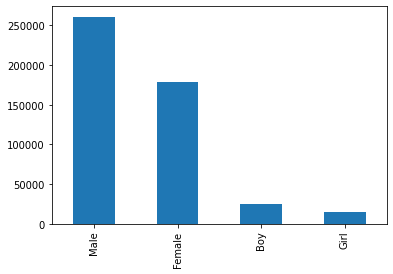

In [49]:
# Value count de Sex de forma gráfica
# data_sex.value_counts().plot.bar()
data['SEX'].value_counts().plot.bar();

### Cual es la distribución de la variable AGE?

Media, mediana y moda:

In [50]:
# print the mean, median and mode of the age distribution
print("Media: {}".format(data['AGE'].mean()))
print("Mediana: {}".format(data['AGE'].median()))
print("Moda: {}".format(data['AGE'].mode()))

Media: 44.91226380480646
Mediana: 47.0
Moda: 0    0
Name: AGE, dtype: int64


Top 10 de las edades mas repetidas.

In [51]:
# top 10 age
data['AGE'].value_counts().head(10)

0     17513
50    16191
55    15184
45    15052
60    13732
46    12858
56    12590
51    12470
40    11962
65    11878
Name: AGE, dtype: int64

<AxesSubplot:>

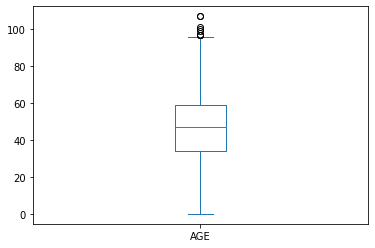

In [52]:
# boxplot para AGE
data['AGE'].plot.box()

En el grafico de arriba, la caja representa el **[Rango Intercuatilico (IQR, en inglés)](https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico)** de los datos. 


El IQR representa la región donde cae el 50% de los datos. Por ejemplo del 25% al 75% del dataframe.
Todo dato que cae fuera de 1.5 veces el IQR es considerado, en general, una anomalía (OJO, NO SIEMPRE, DEPENDE DEL CONOCIMIENTO DE LOS DATOS POR PARTE DEL ANALISTA)

Los círculos se considerarían _outliers_

La librería _Seaborn_ ofrece visualizaciones mejores, de forma sencilla.


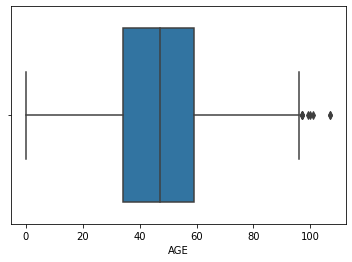

In [53]:
# sns.boxplot(data['AGE']) # Devuelve un warning, que se solucina definiendo x e y.
sns.boxplot(x=data['AGE']); # El ; evita la impresión de texto previo al gráfico.

### Preguntando y respondiendo con los datos

Una vez que hayamos realizado una pequeña exploración en los datos, ahora avancemos a realizarnos algunas preguntas para entender mejor el dataframe.

**Qué debería hacer si sólo quiero analizar los registros que pertenecen al distrito de Krishna?**

Deberí selecciononar un subconjunto de datos pertenencientes a Krishna. Pandas lo hace en dos sencillos pasos:

    1. Condición que se debe satisfacer: data['DISTRICT_NAME']=='Krishna'
    2. Insertamos la condición en el dataframe: [data['DISTRICT_NAME']=='Krishna']
      

In [54]:
# subset de datos que pertenecen al distrito de Krishna
krishna = data.loc[data['DISTRICT_NAME']=='Krishna']
krishna.to_csv('data/krishna_cut.csv', index = False)

In [55]:
data.loc[data['DISTRICT_NAME']=='Krishna'].to_csv('krishna_cut.csv', index = False)

**Estadísticas por categoria de operación**

Vamos a utilizar el _groupby_ de Pandas para construir estadísticas, agrupando los datos por la categoría de operación. El _groupby_ trabaja de forma similar al comando de _SQL_ del mismo nombre

In [56]:
data.columns

Index(['AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION', 'CATEGORY', 'DIFF', 'DISCOUNT_COST'],
      dtype='object')

In [57]:
# group by surgery para obtener estadísticas
data.groupby(['CATEGORY_NAME','SEX']).mean()
#data.groupby(['CATEGORY_NAME','HOSP_DISTRICT']).mean()

AGE   PREAUTH_AMT  \
CATEGORY_NAME                      SEX                               
CARDIAC AND CARDIOTHORACIC SURGERY Boy      4.013562  93489.256781   
                                   Female  53.477690  88877.845829   
                                   Girl     4.116635  86519.702677   
                                   Male    54.540619  85984.827489   
CARDIOLOGY                         Boy     11.133333  85490.666667   
...                                              ...           ...   
SURGICAL GASTRO ENTEROLOGY         Male    45.821070  66707.396321   
SURGICAL ONCOLOGY                  Boy     10.421053  39630.421053   
                                   Female  50.684096  42808.181713   
                                   Girl     8.500000  46669.894737   
                                   Male    52.049853  49753.387897   

                                           CLAIM_AMOUNT          DIFF  \
CATEGORY_NAME                      SEX                                  
CARDIAC AND CARDIOTHORACIC SURGERY Boy     89437.787523  -4051.469259   
                                   Female  84843.775689  -4034.070140   
                                   Girl    84019.333652  -2500.369025   
                                   Male    81080.929801  -4903.897688   
CARDIOLOGY                         Boy     61929.000000 -23561.666667   
...                                                 ...           ...   
SURGICAL GASTRO ENTEROLOGY         Male    62079.110368  -4628.285953   
SURGICAL ONCOLOGY                  Boy     34752.263158  -4878.157895   
                                   Female  40411.641629  -2396.540084   
                                   Girl    43262.000000  -3407.894737   
                                   Male    46392.943482  -3360.444415   

                                           DISCOUNT_COST  
CATEGORY_NAME                      SEX                    
CARDIAC AND CARDIOTHORACIC SURGERY Boy          0.000000  
                                   Female   49627.930155  
                                   Girl         0.000000  
                                   Male     50665.026255  
CARDIOLOGY                         Boy          0.000000  
...                                                  ...  
SURGICAL GASTRO ENTEROLOGY         Male     22414.826756  
SURGICAL ONCOLOGY                  Boy          0.000000  
                                   Female   20116.906125  
                                   Girl         0.000000  
                                   Male     23897.441189  

[105 rows x 5 columns]

Cochlear Implant Surgery es el que tiene la operación mas costosa. (₹520000 en promedio). Las Protesis (Prostheses) cuestan ₹1200 (las mas baratas). A su vez, el grupo mas joven también para ser el que demanada la Cochlear Implant Surgery: 1.58 años, mientras que Neurology  tiene pacientes de, en promedio, ~56.

In [58]:
#data.groupby(['HOSP_DISTRICT','CATEGORY_NAME'])['AGE'].mean().reset_index()
data.groupby(['CATEGORY_NAME','SEX']).agg({'AGE':'mean','MORTALITY_DATE':'count', 'DISCHARGE_DATE':'max'}).reset_index()



,CATEGORY_NAME,SEX,AGE,MORTALITY_DATE,DISCHARGE_DATE
0,CARDIAC AND CARDIOTHORACIC SURGERY,Boy,4.013562,62,2017-12-09
1,CARDIAC AND CARDIOTHORACIC SURGERY,Female,53.477690,391,2017-12-10
2,CARDIAC AND CARDIOTHORACIC SURGERY,Girl,4.116635,40,2017-12-09
3,CARDIAC AND CARDIOTHORACIC SURGERY,Male,54.540619,535,2017-12-10
4,CARDIOLOGY,Boy,11.133333,0,2017-10-24
...,...,...,...,...,...
100,SURGICAL GASTRO ENTEROLOGY,Male,45.821070,15,2017-12-09
101,SURGICAL ONCOLOGY,Boy,10.421053,0,2017-11-15
102,SURGICAL ONCOLOGY,Female,50.684096,45,2017-12-10
103,SURGICAL ONCOLOGY,Girl,8.500000,0,2017-12-09


**Que intervenciones están vinculadas a SURGERY**

In [59]:
data.loc[data['CATEGORY_NAME'].str.contains('SURGERY')].groupby(['SEX']).mean()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DIFF,DISCOUNT_COST
SEX,,,,,
Boy,7.295001,54169.084949,50582.253756,-3586.831194,0.000000
Female,46.396697,45233.060813,42182.035286,-3051.025527,20297.887297
Girl,6.639416,55306.632482,52280.439781,-3026.192701,0.000000
Male,47.727112,51022.281661,47558.443743,-3463.837918,25156.232899


**Edad minima y maxima por CATEGORY**

In [60]:
data.groupby(['CATEGORY_NAME']).agg(
    **{
        'Edad Promedio': ('AGE', 'mean'),
        'Edad Maxima': ('AGE', 'max'),
    }).reset_index()

,CATEGORY_NAME,Edad Promedio,Edad Maxima
0,CARDIAC AND CARDIOTHORACIC SURGERY,51.764553,90
1,CARDIOLOGY,54.652048,93
2,COCHLEAR IMPLANT SURGERY,1.581081,11
3,CRITICAL CARE,51.014649,90
4,DERMATOLOGY,46.573171,86
5,ENDOCRINOLOGY,45.066667,96
6,ENT SURGERY,32.521940,86
7,GASTROENTEROLOGY,41.662383,88
8,GENERAL MEDICINE,35.330161,89
9,GENERAL SURGERY,44.979473,92


**Operación mas común por grupo de edad**

Para encontrar la operación mas común por grupo de edad, vamos a redondear las edades al valor múltiplo de 10 mas cercano.

Hacemos una copia del dataframe para no _ensuciar_ el dataframe original.

In [61]:
dataround = data.copy()

Utilizamos la función _round_ de Pandas para redonder el valor de la edad. *-1* indica que redondeamos hasta1 dígito a la izquierda del valor decimal.

In [62]:
# round a la edad en 0 o 1
dataround['AGE'] = dataround['AGE'].round(-1)

Visualizamos los grupos de edad utilizando la función _Seaborn countplot_ 

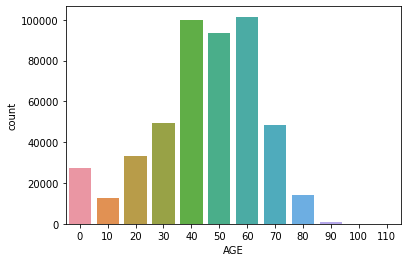

In [63]:
# frequency plot
sns.countplot(x=dataround['AGE']);

In [64]:
res = dataround.groupby(['AGE', 'CATEGORY_NAME'], as_index=False)['SEX'].count()\
        .sort_values('SEX', ascending=False)\
        .drop_duplicates('AGE')\
        .sort_values('AGE')
        
res

,AGE,CATEGORY_NAME,SEX
16,0,PEDIATRICS,19395
44,10,POLY TRAUMA,3564
70,20,POLY TRAUMA,7631
97,30,POLY TRAUMA,8382
116,40,NEPHROLOGY,18972
143,50,NEPHROLOGY,19411
168,60,NEPHROLOGY,18050
199,70,POLY TRAUMA,9217
222,80,POLY TRAUMA,4762
243,90,POLY TRAUMA,445


#### Unir dataframes

Vamos a descargar la tabla de distritos del estado de Andhra Pradesh (https://en.wikipedia.org/wiki/List_of_districts_of_Andhra_Pradesh) con algunas variables adicionales, para pegarle datos del dataframe original a nivel distrito.

In [65]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_districts_of_Andhra_Pradesh'
df_wiki = pd.read_html(wiki_url)[2]
df_wiki

,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Map
0,SR,Srikakulam,Srikakulam,3,30,2191471,4591,477.34,NaN
1,PM,Parvathipuram Manyam,Parvathipuram,2,15,925340,3659,252.89,NaN
2,VZ,Vizianagaram,Vizianagaram,2,27,1930811,4122,468.42,NaN
3,VS,Visakhapatnam,Visakhapatnam,2,11,1959544,1048,1869.79,NaN
4,AS,Alluri Sitharama Raju,Paderu,2,22,953960,12251,77.87,NaN
5,AK,Anakapalli,Anakapalli,2,24,1726998,4292,402.38,NaN
6,KK,Kakinada,Kakinada,2,21,2092374,3019,693.07,NaN
7,EG,East Godavari,Rajahmahendravaram,2,20,1832332,2561,715.48,NaN
8,KN,Dr. B.R. Ambedkar Konaseema,Amalapuramu,3,22,1719093,2083,825.30,NaN
9,EL,Eluru,Eluru,3,28,2071700,6679,310.18,NaN


Vamos a agregar ua columna en la tabla extraída de wikipedia con la cantidad de personas de cada Distrito, que aparece en la base del programa de salud.

Para poder hacerlo, vamos a crear un nuevo dataframe que es el resultado de agrupar en la base del programa la cantidad de registros por distrito.

In [66]:
df_new = data.groupby(['HOSP_DISTRICT'])['AGE'].count().reset_index()
df_new

,HOSP_DISTRICT,AGE
0,Anantapur,18444
1,Chittoor,49172
2,East Godavari,58065
3,Guntur,60988
4,Hyderabad,27915
5,Karimnagar,11
6,Khammam,346
7,Krishna,45174
8,Kurnool,33024
9,Mahabubnagar,6


Vamos a cambiar el nombre de la columna AGE:

In [67]:
df_new.rename(columns = {'AGE': 'Cantidad de Personas en el programa'}, 
                inplace = True)

In [68]:
df_new

,HOSP_DISTRICT,Cantidad de Personas en el programa
0,Anantapur,18444
1,Chittoor,49172
2,East Godavari,58065
3,Guntur,60988
4,Hyderabad,27915
5,Karimnagar,11
6,Khammam,346
7,Krishna,45174
8,Kurnool,33024
9,Mahabubnagar,6


In [69]:
df_merged = pd.merge(df_wiki,
                    df_new,
                    left_on = 'Official name',
                    right_on = 'HOSP_DISTRICT',
                    how = 'left')

In [70]:
df_merged.reset_index()

,index,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Map,HOSP_DISTRICT,Cantidad de Personas en el programa
0,0,SR,Srikakulam,Srikakulam,3,30,2191471,4591,477.34,NaN,Srikakulam,16137.0
1,1,PM,Parvathipuram Manyam,Parvathipuram,2,15,925340,3659,252.89,NaN,NaN,NaN
2,2,VZ,Vizianagaram,Vizianagaram,2,27,1930811,4122,468.42,NaN,Vizianagaram,13563.0
3,3,VS,Visakhapatnam,Visakhapatnam,2,11,1959544,1048,1869.79,NaN,NaN,NaN
4,4,AS,Alluri Sitharama Raju,Paderu,2,22,953960,12251,77.87,NaN,NaN,NaN
5,5,AK,Anakapalli,Anakapalli,2,24,1726998,4292,402.38,NaN,NaN,NaN
6,6,KK,Kakinada,Kakinada,2,21,2092374,3019,693.07,NaN,NaN,NaN
7,7,EG,East Godavari,Rajahmahendravaram,2,20,1832332,2561,715.48,NaN,East Godavari,58065.0
8,8,KN,Dr. B.R. Ambedkar Konaseema,Amalapuramu,3,22,1719093,2083,825.30,NaN,NaN,NaN
9,9,EL,Eluru,Eluru,3,28,2071700,6679,310.18,NaN,NaN,NaN


Borramos la columna HOSP_DISTRICT

In [71]:
df_merged = df_merged[['Code[10]', 'Official name', 'Headquarters', 'Revenuedivisions',
       'Mandals', 'Population', 'Area(in sq.km)', 'Density(per sq.km)', 'Cantidad de Personas en el programa']]

In [72]:
df_merged

,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el programa
0,SR,Srikakulam,Srikakulam,3,30,2191471,4591,477.34,16137.0
1,PM,Parvathipuram Manyam,Parvathipuram,2,15,925340,3659,252.89,NaN
2,VZ,Vizianagaram,Vizianagaram,2,27,1930811,4122,468.42,13563.0
3,VS,Visakhapatnam,Visakhapatnam,2,11,1959544,1048,1869.79,NaN
4,AS,Alluri Sitharama Raju,Paderu,2,22,953960,12251,77.87,NaN
5,AK,Anakapalli,Anakapalli,2,24,1726998,4292,402.38,NaN
6,KK,Kakinada,Kakinada,2,21,2092374,3019,693.07,NaN
7,EG,East Godavari,Rajahmahendravaram,2,20,1832332,2561,715.48,58065.0
8,KN,Dr. B.R. Ambedkar Konaseema,Amalapuramu,3,22,1719093,2083,825.30,NaN
9,EL,Eluru,Eluru,3,28,2071700,6679,310.18,NaN


In [73]:
df_merged.to_csv('data/ntrarogyasev_merged.csv', index = False)

### Anomalías
Fuente: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

In [74]:
# Leemos el dataset
# data = pd.read_csv('data/ntrarogyaseva_fixed.csv')

<AxesSubplot:xlabel='AGE', ylabel='CLAIM_AMOUNT'>

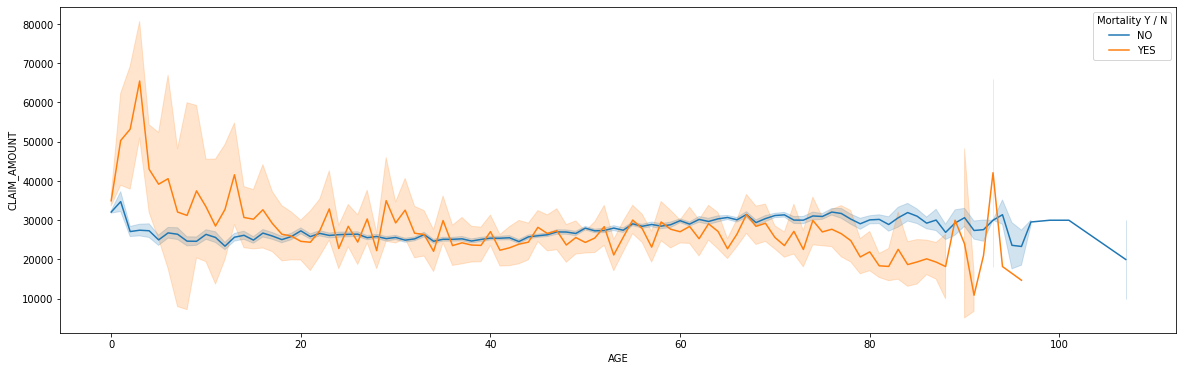

In [75]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=data, x="AGE", y="CLAIM_AMOUNT", ci=95, hue="Mortality Y / N")
# sns.scatterplot(x='AGE', 
#              y='CLAIM_AMOUNT', 
#              data=data, 
#              color='g')

In [76]:
# Reducimos el DF para trabajar con mayor velocidad
# d1 = pd.to_datetime('2016-06-01')
# data_graph = data.loc[data['PREAUTH_DATE']<d1]

data_graph = data.loc[data['SURGERY_DATE']>'29/12/2016 00:00:00']

#data_graph = data_graph.copy()
data_graph.shape

(330905, 26)

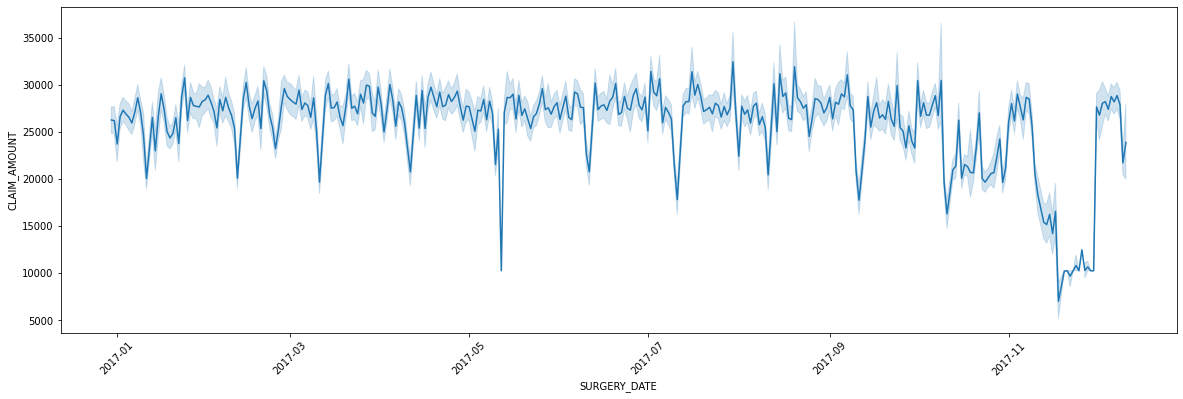

In [77]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=data_graph, x="SURGERY_DATE", y="CLAIM_AMOUNT")
plt.xticks(rotation=45); # el ; oculta el texto previo al gráfico. El mismo resultado se logra con plt.show()

In [78]:
data_graph.sort_values(by='SURGERY_DATE', ascending=False)
data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
data_graph['CLAIM_AMOUNT_RM'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean()

#data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'] - 3*data_graph['CLAIM_AMOUNT']
#data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'] + 3*data_graph['CLAIM_AMOUNT']
# data_graph['CLAIM_AMOUNT_RM'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean()

/tmp/ipykernel_8747/304419442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
/tmp/ipykernel_8747/304419442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
/tmp/ipykernel_8747/304419442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

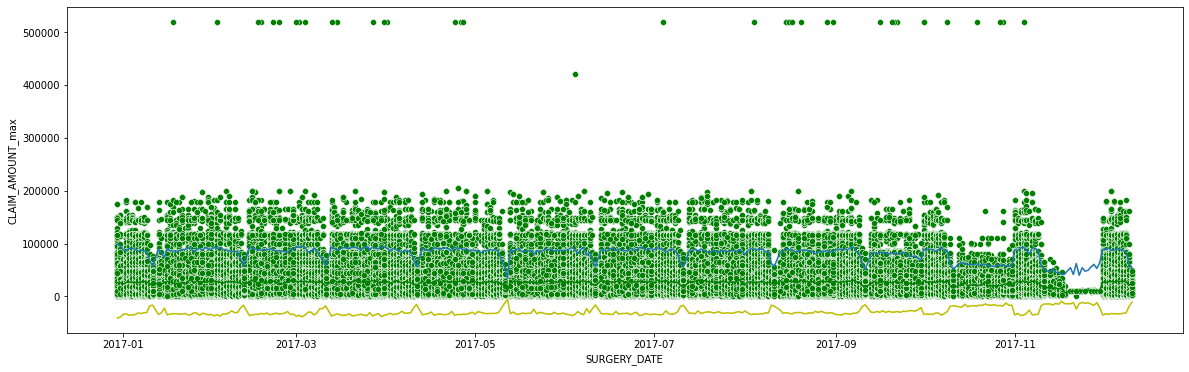

In [79]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=data_graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=data_graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g')

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g')

# ax.axes.set_title("Date and Claim Amount",fontsize=20)
# ax.set_xlabel("Date",fontsize=15)
# ax.set_ylabel("Claim Amount",fontsize=15)
# ax.tick_params(labelsize=5)
# plt.xticks(rotation=45)

plt.show()

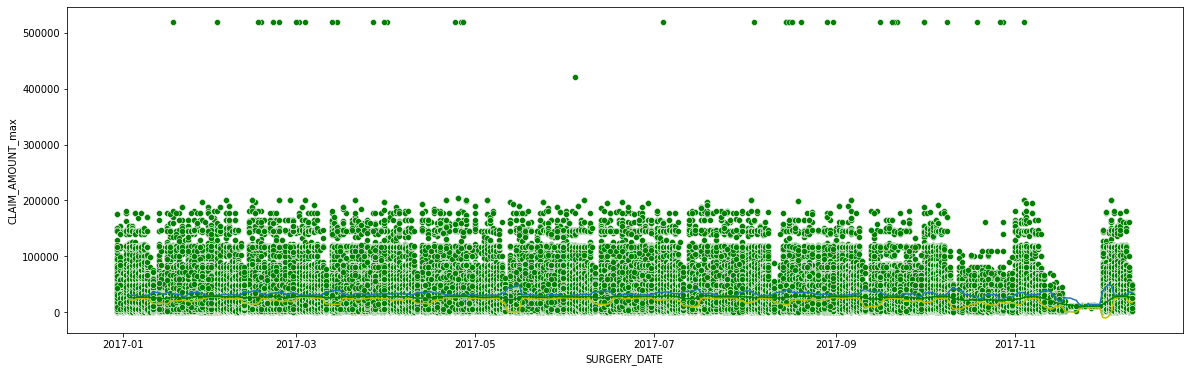

In [80]:
# Agrupamos los datos por fecha, con el promedio del CLAIM_AMOUNT
graph = data_graph.groupby(['SURGERY_DATE']).agg({'CLAIM_AMOUNT': 'mean'}).reset_index()

# Calculamos el la media movil para el CLAIM_AMOUNT y -+ 3 desvíos
graph.sort_values(by='SURGERY_DATE', ascending=False)
graph['CLAIM_AMOUNT_min'] = graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*graph['CLAIM_AMOUNT'].rolling(5).std()
graph['CLAIM_AMOUNT_max'] = graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*graph['CLAIM_AMOUNT'].rolling(5).std()
graph['CLAIM_AMOUNT_RM'] = graph['CLAIM_AMOUNT'].rolling(5).mean()

fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT_RM', 
             data=graph, 
             color='g')

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g');

#### Eliminar outliers

- Computamos el Z-score para la columna seleccionada, relativo a la media y al STD de esa columna
- Tomamos el valor absoluto del Z-score.

Si queremos calcular para todas las variables
- df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
  
_all(axis=1)_  garantiza qeu para cada fila, todas las columnas satisfacen la restricciónensures that for each row, all column satisfy the constraint.


In [81]:
from scipy import stats
import numpy as np
# graph_graph = data_graph.groupby(['SURGERY_DATE']).agg({'CLAIM_AMOUNT': 'mean'}).reset_index()

data_graph = data_graph[(np.abs(stats.zscore(data_graph['CLAIM_AMOUNT'])) < 3)]

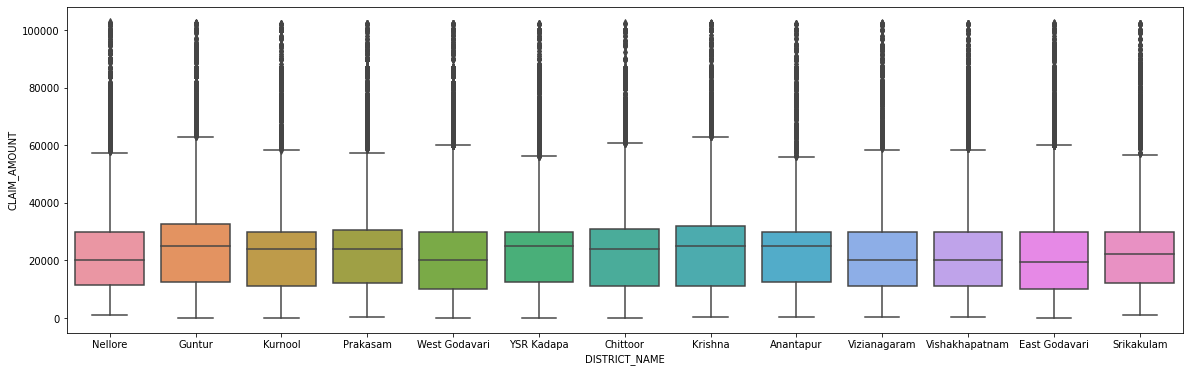

In [82]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.boxplot(x=data_graph['DISTRICT_NAME'], y=data_graph['CLAIM_AMOUNT']);

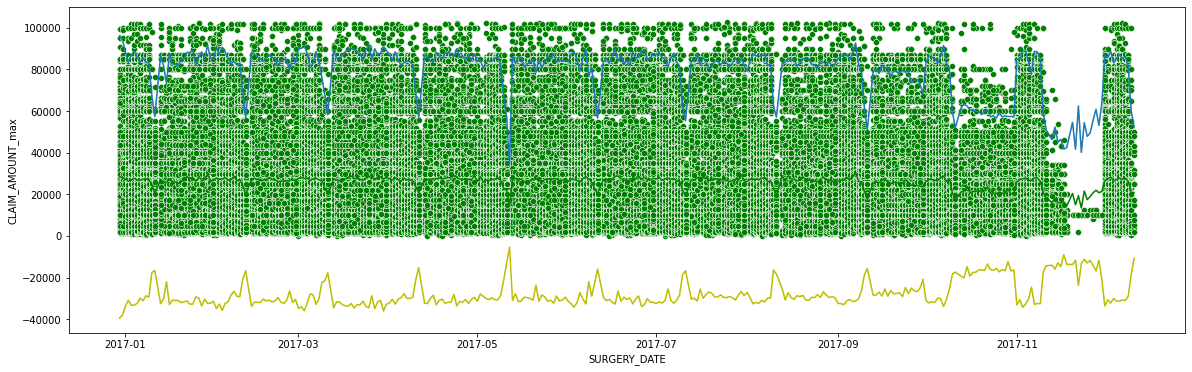

In [83]:
# Graficamos las series sin los valores que exceden el z-score
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=data_graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=data_graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT_RM', 
             data=data_graph, 
             color='g',
             ci=False)

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g');

### MAPA

Los mapas _shp_ necesarios para correr esta sección se pueden descargar siguiendo [este enlace](http://projects.datameet.org/maps/districts/) o directamente desde [acá](https://github.com/datameet/maps/archive/master.zip). Sólo vamos a utilizar los archivos de la carpeta ``/maps-master/Districts/Census_2011``

In [84]:
import geopandas
import pandas as pd

In [85]:
df_merged = pd.read_csv('data/ntrarogyasev_merged.csv')

In [86]:
df_merged

,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el programa
0,SR,Srikakulam,Srikakulam,3,30,2191471,4591,477.34,16137.0
1,PM,Parvathipuram Manyam,Parvathipuram,2,15,925340,3659,252.89,NaN
2,VZ,Vizianagaram,Vizianagaram,2,27,1930811,4122,468.42,13563.0
3,VS,Visakhapatnam,Visakhapatnam,2,11,1959544,1048,1869.79,NaN
4,AS,Alluri Sitharama Raju,Paderu,2,22,953960,12251,77.87,NaN
5,AK,Anakapalli,Anakapalli,2,24,1726998,4292,402.38,NaN
6,KK,Kakinada,Kakinada,2,21,2092374,3019,693.07,NaN
7,EG,East Godavari,Rajahmahendravaram,2,20,1832332,2561,715.48,58065.0
8,KN,Dr. B.R. Ambedkar Konaseema,Amalapuramu,3,22,1719093,2083,825.30,NaN
9,EL,Eluru,Eluru,3,28,2071700,6679,310.18,NaN


In [87]:
dfg = geopandas.read_file('data/Census_2011/2011_Dist.shp')

In [88]:
type(dfg)

geopandas.geodataframe.GeoDataFrame

In [89]:
dfg.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


<AxesSubplot:>

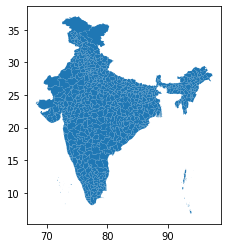

In [90]:
dfg['geometry'].plot()

In [91]:
df = pd.merge(dfg,
              df_merged,
              left_on = 'DISTRICT',
              right_on ='Official name',
              how = 'left'
             )

In [92]:
df

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el programa
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Tapi,Gujarat,24,26,493,"POLYGON ((74.08573 21.55513, 74.08672 21.55515...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# df = df.loc[df['Population']>0]

In [94]:
df

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el programa
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Tapi,Gujarat,24,26,493,"POLYGON ((74.08573 21.55513, 74.08672 21.55515...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(76.36042095019074, 85.16897052217516, 12.29517878738338, 19.49279635675621)

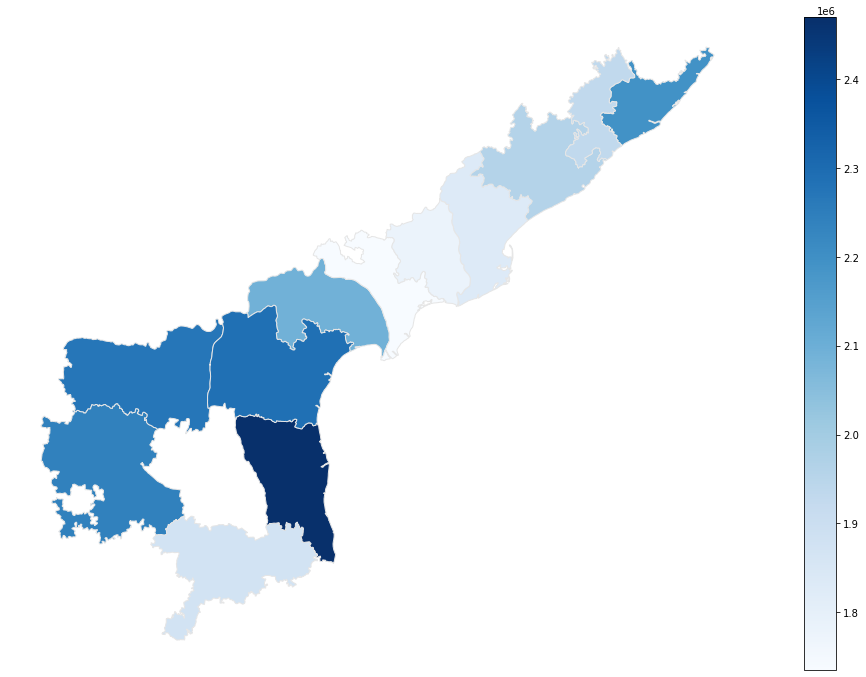

In [95]:
fig, ax = plt.subplots(1, figsize=(20,12))
df.plot(column='Population', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

## Exportar Notebook 
Primero, obtenemos el nombre del archivo

In [ ]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

Exportamos todo el notebook. Código y resultados

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --to html $nb_name 

Exportamos solo los resultados

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --no-input --to html $nb_name 

Exportamos solo resultados, y sólo celdas que no tengan _tag=no_

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='{"no"}' --no-input --to html $nb_name 

## Geolocalización de hospitales

In [96]:
data.head(3)

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CATEGORY,DIFF,DISCOUNT_COST
0,56,Female,backward class,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,...,SRIKAKULAM,Srikakulam,2013-06-08,2013-07-09,NO,NaT,D,M6 - NEPHROLOGY,-1500,11250.0
1,37,Male,backward class,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,...,SRIKAKULAM,Srikakulam,2013-08-08,2013-09-09,NO,NaT,D,M6 - NEPHROLOGY,-1500,0.0
2,50,Male,backward class,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,...,SRIKAKULAM,Srikakulam,2013-08-15,2013-10-18,NO,NaT,D,M6 - NEPHROLOGY,-1000,11250.0


In [97]:
data.columns

Index(['AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION', 'CATEGORY', 'DIFF', 'DISCOUNT_COST'],
      dtype='object')

In [98]:
data['add'] = data['HOSP_NAME'] +', ' + data['HOSP_LOCATION'] + ', ' + data['HOSP_DISTRICT'] + ', India'

In [99]:
hosp = data['add'].unique()

In [100]:
from geopandas.tools import geocode

In [101]:
geo = geocode(hosp, provider='nominatim', user_agent='test_flacso', timeout=4)

In [121]:
hospital = pd.DataFrame(hosp, columns = ['hospital'])

In [122]:
geo = geo.join(hospital,rsuffix='_right')

In [123]:
geo = geo.loc[geo['address'].notna()]

In [124]:
type(geo)

geopandas.geodataframe.GeoDataFrame

(76.36042095019074, 85.16897052217516, 12.29517878738338, 19.49279635675621)

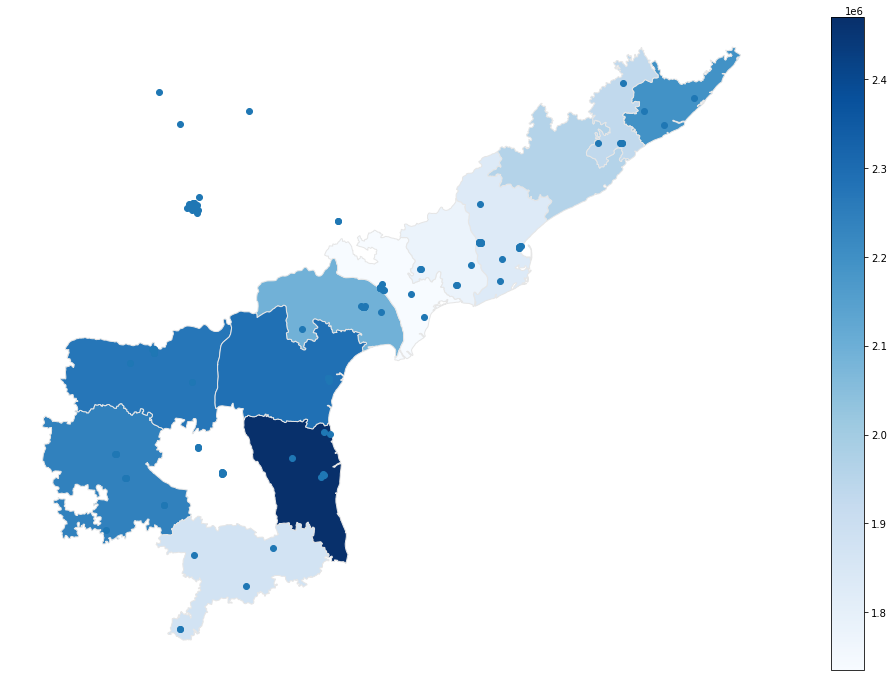

In [125]:
fig, ax = plt.subplots(1, figsize=(20,12))
df.plot(column='Population', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
geo.plot(ax=ax)
ax.axis('off')

In [126]:
import altair as alt

In [127]:
geo['lon'] = geo['geometry'].x
geo['lat'] = geo['geometry'].y

In [128]:
geo

,geometry,address,lon,lat,hospital
3,POINT (80.45380 16.29855),"Karumuri Super Speciality Hospital Pvt Ltd, Do...",80.453795,16.298553,"Karumuri Hospital, GUNTUR, Guntur, India"
6,POINT (78.45359 17.42263),Nizams Institute of Medical Sciences Hospital ...,78.453588,17.422629,"Nims Hospitals, HYDERABAD, Hyderabad, India"
14,POINT (80.64680 16.24299),"Aswini Children's & Dental Hospital, Prakasam ...",80.646799,16.242985,"Aswini Hospital, GUNTUR, Guntur, India"
16,POINT (80.45424 16.29602),"Sailaja Multispeciality Hospital, Guntur - Han...",80.454239,16.296021,"SAILAJA MULTISPECIALITY HOSPITAL, GUNTUR, Gunt..."
18,POINT (82.22731 16.95571),"Government General Hospital, SH216, Kakinada, ...",82.227313,16.955713,"Government General Hospital,Kakinada, KAKINADA..."
...,...,...,...,...,...
447,POINT (78.49150 17.40047),"Mahesh Hospital And Research Foundation, Himay...",78.491496,17.400473,"Mahesh Hospital And Research Foundation, HYDER..."
456,POINT (80.46347 16.30720),"Vedanta Hospitals, contaioner terminal, Guntur...",80.463470,16.307198,"VEDANTA HOSPITALS, GUNTUR, Guntur, India"
460,POINT (81.09550 16.71531),"Prabha Hospital, RR Peta Road, Narasimha Rao P...",81.095502,16.715308,"PRABHA HOSPITAL, ELURU, West Godavari, India"
463,POINT (78.04122 15.83567),"Health Care Noble Multi-Speciality Hospital, M...",78.041217,15.835671,"NOBLE MULTI SPECIALITY HOSPITAL, KURNOOL, Kurn..."


In [132]:
geo['name'] = geo['hospital'].str.split(pat = ',', expand=True)[0]

In [153]:
df_join = df.loc[df['Population']>0]
spatial_join = geopandas.sjoin(geo, df_join, op='within')

/home/mato/jupyter/jupyterenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [154]:
spatial_join

,geometry,address,lon,lat,hospital,name,index_right,DISTRICT,ST_NM,ST_CEN_CD,...,censuscode,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el programa
3,POINT (80.45380 16.29855),"Karumuri Super Speciality Hospital Pvt Ltd, Do...",80.453795,16.298553,"Karumuri Hospital, GUNTUR, Guntur, India",Karumuri Hospital,210,Guntur,Andhra Pradesh,28,...,548,GU,Guntur,Guntur,2.0,18.0,2091075.0,2443.0,855.95,60988.0
14,POINT (80.64680 16.24299),"Aswini Children's & Dental Hospital, Prakasam ...",80.646799,16.242985,"Aswini Hospital, GUNTUR, Guntur, India",Aswini Hospital,210,Guntur,Andhra Pradesh,28,...,548,GU,Guntur,Guntur,2.0,18.0,2091075.0,2443.0,855.95,60988.0
16,POINT (80.45424 16.29602),"Sailaja Multispeciality Hospital, Guntur - Han...",80.454239,16.296021,"SAILAJA MULTISPECIALITY HOSPITAL, GUNTUR, Gunt...",SAILAJA MULTISPECIALITY HOSPITAL,210,Guntur,Andhra Pradesh,28,...,548,GU,Guntur,Guntur,2.0,18.0,2091075.0,2443.0,855.95,60988.0
29,POINT (80.44354 16.29972),Government General Hospital's Blood Bank - Gun...,80.443536,16.299715,"Government General Hospital, Guntur, GUNTUR, G...",Government General Hospital,210,Guntur,Andhra Pradesh,28,...,548,GU,Guntur,Guntur,2.0,18.0,2091075.0,2443.0,855.95,60988.0
65,POINT (80.45011 16.29834),"Yashaswi Hospital, Donka Road, Arundelpet, Gun...",80.450111,16.298336,"YASHASWI HOSPITALS, GUNTUR, Guntur, India",YASHASWI HOSPITALS,210,Guntur,Andhra Pradesh,28,...,548,GU,Guntur,Guntur,2.0,18.0,2091075.0,2443.0,855.95,60988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,POINT (80.99250 16.43962),"Annapurna Multi Speciality Hospital, Machilipa...",80.992504,16.439625,"ANNAPURNA MULTI SPECIALITY HOSPITAL, GUDIVADA,...",ANNAPURNA MULTI SPECIALITY HOSPITAL,322,Krishna,Andhra Pradesh,28,...,547,KR,Krishna,Machilipatnam,3.0,25.0,1735079.0,3775.0,459.62,45174.0
464,POINT (80.67153 16.48985),"Liberty Hospitals, Bandar Road, Vijayawada, Vi...",80.671525,16.489853,"LIBERTY HOSPITALS, Vijayawada, Krishna, India",LIBERTY HOSPITALS,322,Krishna,Andhra Pradesh,28,...,547,KR,Krishna,Machilipatnam,3.0,25.0,1735079.0,3775.0,459.62,45174.0
99,POINT (83.65838 18.46153),"GMR Varalakshmi Care Hospital Blood Bank, Main...",83.658377,18.461530,"GMR Varalakshmi CARE Hospital , SRIKAKULAM, Sr...",GMR Varalakshmi CARE Hospital,549,Srikakulam,Andhra Pradesh,28,...,542,SR,Srikakulam,Srikakulam,3.0,30.0,2191471.0,4591.0,477.34,16137.0
194,POINT (84.23868 18.60156),"Area Hospital,Tekkali, Naupada - Tekkali - Mel...",84.238677,18.601565,"Area hospital - Tekkali, SRIKAKULAM, Srikakula...",Area hospital - Tekkali,549,Srikakulam,Andhra Pradesh,28,...,542,SR,Srikakulam,Srikakulam,3.0,30.0,2191471.0,4591.0,477.34,16137.0


In [171]:
points = alt.Chart(spatial_join).mark_circle().encode(
    longitude='lon:Q',
    latitude='lat:Q',
    tooltip=['name'],
)



fondo = alt.Chart(df.loc[df['Population']>0]).mark_geoshape(stroke='white',
                            fill='lightgray').encode(tooltip =['DISTRICT']).properties(width=800,
                                                                 height=800).project('mercator')

fondo+points
# points



alt.LayerChart(...)

In [161]:
df_join

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el programa
19,Anantapur,Andhra Pradesh,28,22,553,"POLYGON ((78.14427 14.94530, 78.14382 14.94009...",AN,Anantapur,Anantapur,3.0,31.0,2241105.0,10205.0,219.61,18444.0
119,Chittoor,Andhra Pradesh,28,23,554,"POLYGON ((80.01818 13.49927, 80.01815 13.49928...",CH,Chittoor,Chittoor,4.0,31.0,1872951.0,6855.0,273.22,49172.0
168,East Godavari,Andhra Pradesh,28,14,545,"POLYGON ((82.01023 17.96357, 82.01368 17.95620...",EG,East Godavari,Rajahmahendravaram,2.0,20.0,1832332.0,2561.0,715.48,58065.0
210,Guntur,Andhra Pradesh,28,17,548,"POLYGON ((80.81934 15.74265, 80.81973 15.74426...",GU,Guntur,Guntur,2.0,18.0,2091075.0,2443.0,855.95,60988.0
322,Krishna,Andhra Pradesh,28,16,547,"MULTIPOLYGON (((80.60374 17.12738, 80.61251 17...",KR,Krishna,Machilipatnam,3.0,25.0,1735079.0,3775.0,459.62,45174.0
327,Kurnool,Andhra Pradesh,28,21,552,"POLYGON ((78.92098 16.11569, 78.93327 16.06979...",KU,Kurnool,Kurnool,3.0,26.0,2271686.0,7980.0,284.67,33024.0
408,Sri Potti Sriramulu Nellore,Andhra Pradesh,28,19,550,"POLYGON ((80.04883 15.01838, 80.05100 15.00723...",NE,Sri Potti Sriramulu Nellore,Nellore,4.0,38.0,2469712.0,10441.0,236.54,NaN
445,Prakasam,Andhra Pradesh,28,18,549,"POLYGON ((80.43917 15.80629, 80.43345 15.80437...",PR,Prakasam,Ongole,3.0,38.0,2288026.0,14322.0,159.76,16756.0
549,Srikakulam,Andhra Pradesh,28,11,542,"POLYGON ((84.76858 19.08002, 84.76625 19.07514...",SR,Srikakulam,Srikakulam,3.0,30.0,2191471.0,4591.0,477.34,16137.0
605,Visakhapatnam,Andhra Pradesh,28,13,544,"POLYGON ((83.07406 18.40189, 83.08967 18.41428...",VS,Visakhapatnam,Visakhapatnam,2.0,11.0,1959544.0,1048.0,1869.79,NaN
